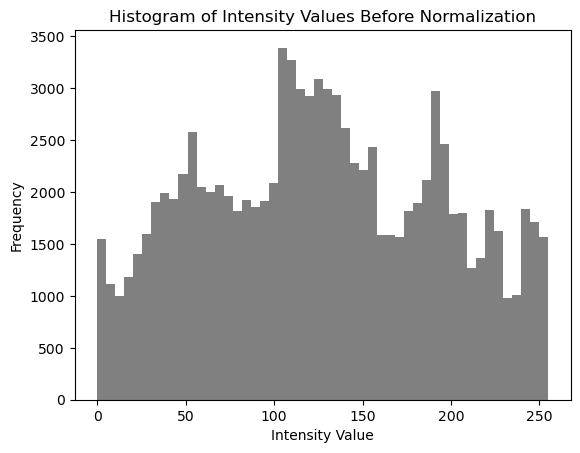

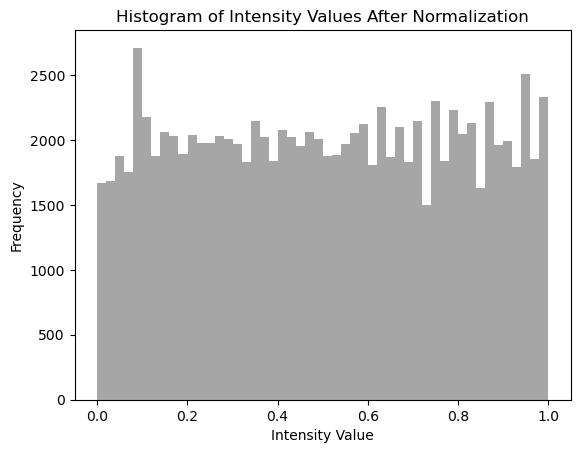

In [3]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
import pandas as pd

# Identifying the folder containing the images
image_dir = 'image'
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.PNG')]

# Step 1. Read in all of the 10 images in python, resize each of them a 100 by 100 pixels format
images_resized = [Image.open(file).resize((100, 100)) for file in image_files]

# Step 2. Convert them to greyscale arrays
images_grey = [image.convert('L') for image in images_resized]

# Step 3. Flatten  the 2‐D array  to a 1‐D array  (vectors)
flattened_images = [np.array(image).flatten() for image in images_grey]

# Combine all flattened images into a single array for histogram
all_pixels_before = np.concatenate(flattened_images)

# Draw histogram before normalization
plt.hist(all_pixels_before, bins=50, color='gray')
plt.title('Histogram of Intensity Values Before Normalization')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

# Step 4. Conduct histogram equalization
equalized_images = [exposure.equalize_hist(np.array(image)) for image in images_grey]
flattened_equalized_images = [image.flatten() for image in equalized_images]

# Combine all flattened images into a single array for histogram
all_pixels_after = np.concatenate(flattened_equalized_images)

# Step 5. Draw histogram after normalization
plt.hist(all_pixels_after, bins=50, color='gray', alpha=0.7)
plt.title('Histogram of Intensity Values After Normalization')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

# Convert the list of flattened arrays to a DataFrame and save to CSV
flattened_df = pd.DataFrame(flattened_images)
flattened_df.to_csv('flattened_images.csv', index=False, header=False)




## Histogram Comparison: Before vs. After Histogram Equalization

Key Differences:
- Uniformity: The equalized histogram shows is flatter with a more even distribution. This is an obvious effect of normalizing a distrubution
- Contrast Improvement: Histogram equalization boosts image contrast, particularly in areas where it was lacking, by spreading out intensity values.
- Detail Visibility: The adjustment in intensity distribution makes previously hidden details within images more visible, improving overall image quality.
